# Simulation du mouvement Brownien

$\textbf{Élève:}$ BLILET Hatim

$\textbf{Groupe de PC:}$ GR3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

$(a)$ D'après le cours, puisque $t_{i+1}^n>t_{i}^n$ alors:
$$W_{t_{i+1}^n} - W_{t_{i}^n} \sim \mathcal{N}(0,t_{i+1}^n-t_{i}^n)$$
Or comme:
$$t_{i+1}^n-t_{i}^n = \Delta T \text{ et }\forall k \in \textbf{R}^+_*: \mathcal{N}(0,k)\equiv \sqrt{k}\mathcal{N}(0,1)$$
On déduit que, en notant:
$$Z_i = \dfrac{W_{t_{i+1}^n} - W_{t_{i}^n}}{\sqrt{\Delta T}} \sim\mathcal{N}(0,1)$$
Or pour $i\leq j$, on a:
$$\sqrt{T}Z_j= W_{t_{j+1}^n} - W_{t_{j}^n} \text{ indépendant de }\sigma({W_s\text{ , }s\leq t_j^{n}})\supset \sigma({W_s\text{ , }s\leq t_i^{n}}) = \mathcal{F}_{t_i}$$
Or $Z_i$ est $\mathcal{F}_{t_i}-$mesurable, on déduit que $Z_j$ et $Z_i$ et ceci pour tout $i\leq j$. On déduit alors que pour $A=A_1\times\cdots\times A_n$ borélien de $\textbf{R}^n$:
$$\textbf{P}((Z_i)\in A) = \underbrace{\textbf{P}(Z_1\in A_1,\cdots, Z_{n-1}\in A_{n-1})\cdot\textbf{P}(Z_n \in \textbf{A}_n)}_{Z_n {\perp\!\!\!\perp}(Z_k)_{k\leq n}} = \cdots = \textbf{P}(Z_1\in A_1) \cdots \textbf{P}(Z_n \in A_n)$$
Ainsi, $(Z_i)$ est une suite de variable aléatoires i.i.d de loi $\mathcal{N}(0,1)$, d'où le résultat:
$$W_{t_{i+1}^n}\stackrel{\text{Loi}}{=}W_{t_i^n}+\sqrt{\Delta T}Z_i$$

$(b)$ Notons $W$ la matrice qu'on veut obtenir et $C_0, \cdots C_n$ ses colonnes, d'après $(a)$:
$$C_{i+1} = C_i+\sqrt{\Delta T}R_i \text{ où }R_i \sim \mathcal{N}(0_m,I_m) \in \textbf{R}^m$$
Soit, en remarquant que pour un mouvement brownien $C_0\equiv 0_m$, en déduit que:
$$\forall i\in \{0,n\}:C_i = \sqrt{\Delta T}\sum_{k=0}^iR_i$$
On génére alors $R$ la matrice de colonnes $R_i$, et on considère la somme cumulée de $R$ suivant les $j$ croissants (suivant les colonnes à ligne fixée).

In [2]:
m = 1000
T=1
n = 100
dt=T/n
R = np.random.normal(0, 1, (m, n))
W = np.zeros((m,n+1))
W[:,1:] =np.cumsum(R, axis=1)
W=np.sqrt(dt)*W

$(c)$ On estime:
$$\textbf{E}(W_T) \simeq \dfrac{1}{m}\sum_{k=1}^m W_T^{(k)} = e_m$$
Ainsi que:
$$\textbf{V}(W_T) \simeq \dfrac{1}{m-1}\sum_{k=1}^m (W_T^{(k)})^2 -e_m^2 $$

In [3]:
m = 1000
T=1
for n in [100,1000,10000]:
    dt=T/n
    R = np.random.normal(0, 1, (m, n))
    W = np.zeros((m,n+1))
    W[:,1:] =np.cumsum(R, axis=1)
    W=np.sqrt(dt)*W
    W_T= W.T[-1]
    W_hT = W.T[int(n/2)]
    mean = np.mean(W_T)
    variance= np.std(W_T,ddof=1)**2
    cov= np.cov(W_T,W_hT,ddof=1)[0][1]
    print(f"========== n = {n} ==========")
    print(f"Espérance: {mean:.4f}")
    print(f"Variance: {variance:.4f}")
    print(f"Covariance: {cov:.4f}\n")
    

========== n = 100 ==========
Espérance: 0.0259
Variance: 1.0909
Covariance: 0.5431

========== n = 1000 ==========
Espérance: 0.0035
Variance: 1.0863
Covariance: 0.5262

========== n = 10000 ==========
Espérance: -0.0370
Variance: 1.0480
Covariance: 0.5170



Ces résultats sont affirmés théoriquement par le fait que $W_T=W_T -W_0 \sim\mathcal{N}(0,T)$ et $\text{Cov}(W_T,W_{T/2}) = \text{min}(T,T/2) = T/2$ où dans notre cas $T=1$.

## Question 2

$(a)$ Montrons que pour $s\leq t$ et $l=\dfrac{s+t}{2}$ que:
$$P \equiv W_l |\{W_s =x, W_t= y\}\sim \mathcal{N}\bigg(\dfrac{x+y}{2}, \dfrac{t-s}{4}\bigg)$$
Comme $(W_t)$ est un mouvement brownien $(W_s,W_l,W_t)$ est un vecteur gaussien de matrice de variance-covariance:
$$V_3= \begin{pmatrix}s &s &s \\
s&l&l\\
s&l&t
\end{pmatrix}\in \textbf{GL}_3(\textbf{R})$$
Il est à densité. Idem, $(W_s,W_t)$ vecteur gaussien de matrice de variance-covariance:
$$V_2 = \begin{pmatrix}s&s\\s&t \end{pmatrix}\in \textbf{GL}_2(\textbf{R})$$
$(W_s,W_t)$ est à densité et pour tout $V\in \textbf{R}$, $f_{W_s,W_t}(V)\neq 0$.

$Remarque:$ Les inversibilités sont obtenus par des calculs de déterminants.

La variable $P$ est donc à densité et:
$$\forall w\in \textbf{R}: f_P(w) =\dfrac{f_{W_s,W_l,W_t}(x,w,y)}{f_{W_s,W_t}(x,y)} \stackrel{^1}{=} \dfrac{f_{W_s,W_l-W_s, W_t-W_l}(x,w-x,y-w)}{f_{W_s,W_t-W_s}(x,y-x)} $$
Or, $(W_s,W_l-W_s,W_t-W_l)$ est un vecteur gaussien de variables indépendantes, ainsi que $(W_s,W_t-W_s)$, on déduit par indépendance que:

$$\forall w\in \textbf{R}: f_P(w) =\dfrac{f_{W_s}(x)\cdot f_{W_l-W_s}(w-x) \cdot f_{W_t-W_l}(y-w) }{f_{W_s}(x)\cdot f_{W_t-W_s}(y-x)}=\dfrac{ f_{W_l-W_s}(w-x) \cdot f_{W_t-W_l}(y-w) }{ f_{W_t-W_s}(y-x)}$$
En notant $f^{(\mu,\sigma^2)}$ la densité de la loi $\mathcal{N}(\mu,\sigma^2)$, on déduit que:
$$\forall w\in \textbf{R}: f_P(w) = \dfrac{f^{(0,l-s)}(w-x)\cdot f^{(0,t-l)}(y-w)}{f^{(0,t-s)}(y-x)} $$
Tout calcul fait, en tenant compte que $t-l = l-s=(t-s)/2$, on obtient après simplification et développement de carrées que:
$$f_P \equiv f^{(\frac{x+y}{2},\frac{t-s}{4})}$$
Soit:
$$P \equiv W_l |\{W_s =x, W_t= y\}\sim \mathcal{N}\bigg(\dfrac{x+y}{2}, \dfrac{t-s}{4}\bigg)$$
$^1:$ Se montre aisément par méthode de la fonction muette

$(b)$ Pour cette question on se base sur la question précedente, supposons que $(W_0,W_T)=(0,y)$, on simule alors $W_{T/2}\sim \mathcal{N}(y/2, T/4)$ d'après la question précedente. On obtient une valeur $w=W_{T/2}$, idem, $W_{T/4}\sim \mathcal{N}({w/2,T/8})$, $W_{3T/4}\sim \mathcal{N}(\frac{w+y}{2},T/8)$ $\cdots$

In [4]:
def aux_(matrice, debut, fin, variance):
    if debut >= fin - 1:
        return
    else:
        milieu = (debut + fin) // 2
        matrice[:, milieu] = np.random.multivariate_normal(
            (matrice[:, debut] + matrice[:, fin]) / 2, variance * np.eye(matrice.shape[0]) / 4)
        aux_(matrice, debut, milieu, variance / 2)
        aux_(matrice, milieu, fin, variance / 2)

def brownian(k, m=100, T=1):
    matrice = np.zeros((m, 2**k + 1))
    matrice[:, -1] = np.random.normal(0, np.sqrt(T), m)
    aux_(matrice, 0, 2**k, T)
    return matrice

$(c)$ On reprend la fonction définie dans la cellule précedente ainsi que celui de la question $\textbf{1.}(c)$, j'ai pris $m=100$, les temps de calculs sont conséquents:

In [5]:
for k in [8,10,12]:
    n=2**k+1
    W=brownian(k)
    W_T= W.T[-1]
    W_hT = W.T[n//2]
    mean = np.mean(W_T)
    variance= np.std(W_T,ddof=1)**2
    cov= np.cov(W_T,W_hT,ddof=1)[0][1]
    print(f"========== n = {n} ==========")
    print(f"Espérance: {mean:.4f}")
    print(f"Variance: {variance:.4f}")
    print(f"Covariance: {cov:.4f}\n")

========== n = 257 ==========
Espérance: 0.1001
Variance: 0.9176
Covariance: 0.4630

========== n = 1025 ==========
Espérance: 0.2536
Variance: 0.9199
Covariance: 0.4124

========== n = 4097 ==========
Espérance: 0.0305
Variance: 1.1543
Covariance: 0.6330



## Question 3

#### Approche directe

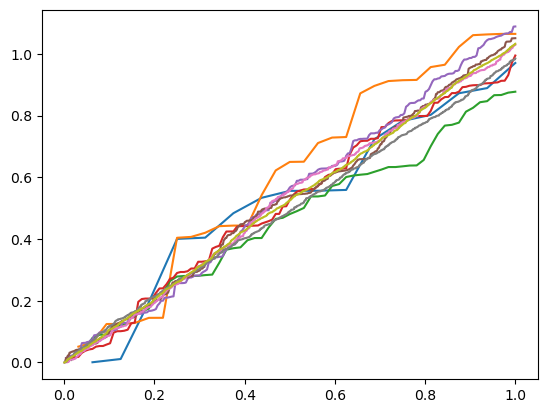

In [6]:
to_graph=[]
T=1
for k in range(4,13):
    m = 1
    n = 2**k
    dt=T/n
    R = np.random.normal(0, 1, (m, n))
    W = np.zeros((m,n+1))
    W[:,1:] =np.cumsum(R, axis=1)
    W=np.sqrt(dt)*W
    V=W[0][:-1]
    U=W[0][1:]
    sums=np.cumsum((U-V)**2)
    to_graph.append([np.linspace(T/n,T,num = n), sums])
for L in to_graph:
    plt.plot(L[0],L[1])
plt.show()

#### Approche rétrograde

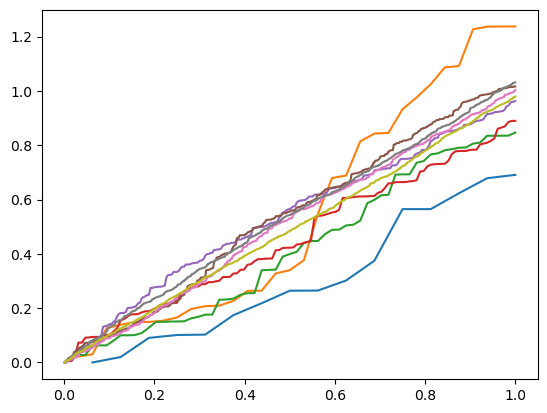

In [7]:
to_graph=[]
T=1
for k in range(4,13):
    W=brownian(k,m=1,T=T)
    n=2**k
    V=W[0][:-1]
    U=W[0][1:]
    sums=np.cumsum((U-V)**2)
    to_graph.append([np.linspace(T/n,T,num = n), sums])
for L in to_graph:
    plt.plot(L[0],L[1])
plt.show()